# Imports

In [ ]:
import pandas as pd
import numpy as np
import random

import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from time import time

%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Capstone/athlete_events.csv')

In [ ]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Weight Data

In [ ]:
def weight(df):
  cols = []
  if 'min' in df.columns:
    minimum = df['min']
    df=df.drop(columns=['min'])
  #print(df.columns)
  for i in df.columns:
    cols.append(i)
    cols.append(i)
  new_df = pd.DataFrame(columns=[cols,['min','max']*len(df.columns)], index=df.index)
  for j in range(len(df.columns)):    #going through the columns
    new_df.iloc[:,2*j+1] = df.iloc[:,j]   # assigning the max values
    if j!=0:
      for l in range(len(df.index)):    #Going through the rows
        if pd.isna(df.iloc[l,j]) == False:
          k=j-1
          while pd.isna(df.iloc[l,k]) and k>=0:
            k-=1
          if k>=0:      
            new_df.iloc[l,2*j] = df.iloc[l,k]   #Assigning the min values
        #else:
         # new_df.iloc[l,2*j] =
  try:
    new_df.iloc[:,0] = minimum
  except:
    pass
  return new_df

### Boxing

In [ ]:
# Boxing mens weights
bmw = pd.read_csv('/content/drive/MyDrive/Capstone/Boxing Men.csv', index_col=[0])
#bmw.loc[2020,'Light-Flyweight'] = np.nan    # Fixing data entry error
bmw.drop(2020, inplace = True)
bmw=bmw[bmw.columns[::-1]]
bmw.columns = bmw.columns.map(lambda x: x.lower())

In [ ]:
for i in range(len(bmw.columns)):
  for j in range(len(bmw.index)):
    try:
      bmw.iloc[j,i] = float(bmw.iloc[j,i])
    except:
      pass

In [ ]:
bmw.iloc[:,:-2].astype(float)

,min,light-flyweight,flyweight,bantamweight,featherweight,lightweight,light-welterweight,welterweight,light-middleweight,middleweight,light-heavyweight
Category,,,,,,,,,,,
1972,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
1976,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
1980,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
1984,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
1988,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
1992,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
1996,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
2000,NaN,48.0,51.0,54.0,57.0,60.0,63.5,67.0,71.0,75.0,81.0
2004,NaN,48.0,51.0,54.0,57.0,60.0,64.0,69.0,NaN,75.0,81.0


In [ ]:
bmwr = weight(bmw)
bmwr

light-flyweight       flyweight  ... heavyweight super-heavyweight     
                     min   max       min  ...         max               min  max
Category                                  ...                                   
1972                 NaN  48.0        48  ...           +               NaN  NaN
1976                 NaN  48.0        48  ...           +               NaN  NaN
1980                 NaN  48.0        48  ...           +               NaN  NaN
1984                 NaN  48.0        48  ...          91                91    +
1988                 NaN  48.0        48  ...          91                91    +
1992                 NaN  48.0        48  ...          91                91    +
1996                 NaN  48.0        48  ...          91                91    +
2000                 NaN  48.0        48  ...          91                91    +
2004                 NaN  48.0        48  ...          91                91    +
2008                 NaN  48.0        48  ...          91                91    +
2012                46.0  49.0        49  ...          91                91    +
2016                46.0  49.0        49  ...          91                91    +

[12 rows x 24 columns]

In [ ]:
# Boxing womens weights
bww=pd.DataFrame([[69,75,57,60,48,51]],columns=[['middleweight','middleweight','lightweight','lightweight','flyweight','flyweight'],['min','max','min','max','min','max']])
bww

middleweight     lightweight     flyweight    
           min max         min max       min max
0           69  75          57  60        48  51

### Wrestling

In [ ]:
# mens freestyle wrestling weights
fwmw = pd.read_csv('/content/drive/MyDrive/Capstone/men_f_wrestling.csv', index_col=[0])
fwmw.loc[[1972,1976,1980,1984],'super-heavyweight']= '+'

In [ ]:
fwmw_new = fwmw.copy()
nums = list(range(8))
for i in range(8):
  fwmw_new.iloc[7:,i]=fwmw.iloc[7:,nums[i-1]]

In [ ]:
fwmwr = weight(fwmw_new)
fwmwr

light-flyweight       flyweight  ... heavyweight super-heavyweight     
                 min   max       min  ...         max               min  max
Year                                  ...                                   
1972             NaN  48.0        48  ...         100               100    +
1976             NaN  48.0        48  ...         100               100    +
1980             NaN  48.0        48  ...         100               100    +
1984             NaN  48.0        48  ...         100               100    +
1988             NaN  48.0        48  ...         100               100  130
1992             NaN  48.0        48  ...         100               100  130
1996             NaN  48.0        48  ...         100               100  130
2000             NaN   NaN       NaN  ...          97                97  130
2004             NaN   NaN       NaN  ...          96                96  120
2008             NaN   NaN       NaN  ...          96                96  120
2012             NaN   NaN       NaN  ...          96                96  120
2016             NaN   NaN       NaN  ...          97                97  125
2020             NaN   NaN       NaN  ...          97                97  125

[13 rows x 20 columns]

In [ ]:
# mens Greco-roman wrestling weights
grwmw = pd.read_csv('/content/drive/MyDrive/Capstone/men_gr_wrestling.csv', index_col=[0])
grwmw.loc[[1972,1976,1980,1984],'super-heavyweight']= '+'

In [ ]:
grwmw_new = grwmw.copy()
nums = list(range(8))
for i in range(8):
  grwmw_new.iloc[7:,i]=grwmw.iloc[7:,nums[i-1]]

In [ ]:
grwmwr = weight(grwmw_new)
grwmwr

light-flyweight       flyweight  ... heavyweight super-heavyweight     
                 min   max       min  ...         max               min  max
Year                                  ...                                   
1972             NaN  48.0        48  ...         100               100    +
1976             NaN  48.0        48  ...         100               100    +
1980             NaN  48.0        48  ...         100               100    +
1984             NaN  48.0        48  ...         100               100    +
1988             NaN  48.0        48  ...         100               100  130
1992             NaN  48.0        48  ...         100               100  130
1996             NaN  48.0        48  ...         100               100  130
2000             NaN   NaN       NaN  ...          97                97  130
2004             NaN   NaN       NaN  ...          96                96  120
2008             NaN   NaN       NaN  ...          96                96  120
2012             NaN   NaN       NaN  ...          96                96  120
2016             NaN   NaN       NaN  ...          98                98  130
2020             NaN   NaN       NaN  ...          97                97  130

[13 rows x 20 columns]

In [ ]:
# womens freestyle wrestling weights
www = pd.read_csv('/content/drive/MyDrive/Capstone/woemens_wrestling_weights.csv', index_col=[0])

In [ ]:
wwwr = weight(www)
wwwr

flyweight     bantamweight      ... light-heavyweight       heavyweight    
           min max          min max  ...               min   max         min max
Year                                 ...                                        
2004       NaN  48           48  55  ...               NaN   NaN          63  72
2008       NaN  48           48  55  ...               NaN   NaN          63  72
2012       NaN  48           48  55  ...               NaN   NaN          63  72
2016       NaN  48           48  53  ...                63  69.0          69  75
2020       NaN  50           50  53  ...                62  68.0          68  76

[5 rows x 12 columns]

### Judo

In [ ]:
# mens judo weights
jmw = pd.read_csv('/content/drive/MyDrive/Capstone/Judo Men.csv', index_col=[0])
jmw.drop(columns='open', inplace=True)

In [ ]:
jmw.columns = ['extra-lightweight', 'half-lightweight', 'lightweight',
       'half-middleweight', 'middleweight', 'half-heavyweight', 'heavyweight']

Open has no weight classes

In [ ]:
jmwr = weight(jmw)
jmwr

extra-lightweight       half-lightweight  ... half-heavyweight heavyweight      
                   min   max              min  ...              max         min   max
Year                                           ...                                   
1972               NaN   NaN              NaN  ...               93          93   93+
1976               NaN   NaN              NaN  ...               93          93   93+
1980               NaN  60.0               60  ...               95          95   95+
1984               NaN  60.0               60  ...               95          95   95+
1988               NaN  60.0               60  ...               95          95   95+
1992               NaN  60.0               60  ...               95          95   95+
1996               NaN  60.0               60  ...               95          95   95+
2000               NaN  60.0               60  ...              100         100  100+
2004               NaN  60.0               60  ...              100         100  100+
2008               NaN  60.0               60  ...              100         100  100+
2012               NaN  60.0               60  ...              100         100  100+
2016               NaN  60.0               60  ...              100         100  100+

[12 rows x 14 columns]

In [ ]:
# womens judo weights
jww = pd.read_csv('/content/drive/MyDrive/Capstone/Judo Women.csv', index_col=[0])
jww.columns = ['extra-lightweight', 'half-lightweight', 'lightweight',
       'half-middleweight', 'middleweight', 'half-heavyweight', 'heavyweight']

In [ ]:
jwwr=weight(jww)
jwwr

extra-lightweight     half-lightweight  ... half-heavyweight heavyweight     
                   min max              min  ...              max         min  max
Year                                         ...                                  
1992               NaN  48               48  ...               72          72  72+
1996               NaN  48               48  ...               72          72  72+
2000               NaN  48               48  ...               78          78  78+
2004               NaN  48               48  ...               78          78  78+
2008               NaN  48               48  ...               78          78  78+
2012               NaN  48               48  ...               78          78  78+
2016               NaN  48               48  ...               78          78  78+

[7 rows x 14 columns]

### Taekwondo

In [ ]:
# Boxing womens weights
tw=pd.DataFrame({'Sex':['M','F'],'flyweight':[58,49],'featherweight':[68,57],'welterweight':[80,67],'heavyweight':['+','+']})
tw = tw.set_index('Sex')
tw

,flyweight,featherweight,welterweight,heavyweight
Sex,,,,
M,58,68,80,+
F,49,57,67,+


In [ ]:
twr= weight(tw)
twr

flyweight     featherweight     welterweight     heavyweight    
          min max           min max          min max         min max
Sex                                                                 
M         NaN  58            58  68           68  80          80   +
F         NaN  49            49  57           57  67          67   +

In [ ]:
list(tw.loc['M'])

[58, 68, 80, '+']

# EDA

In [ ]:
data.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
data['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

# Data Cleaning

## General

In [ ]:
ma = ['Judo', 'Taekwondo', 'Wrestling', 'Boxing']

In [ ]:
ma_data = data[data['Sport'].isin(ma)]

In [ ]:
ma_data = ma_data[ma_data['Year']>1970]

In [ ]:
ma_data = ma_data.drop(columns=['Season', 'Games'])

In [ ]:
ma_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
81,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012,London,Boxing,Boxing Men's Light-Welterweight,NaN
137,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004,Athina,Judo,Judo Men's Middleweight,Gold
270983,135505,Armands Zvirbulis,M,24.0,177.0,84.0,Latvia,LAT,2012,London,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996,Atlanta,Judo,Judo Women's Middleweight,Bronze
271033,135535,Claudia Antoinette Zwiers,F,30.0,181.0,78.0,Netherlands,NED,2004,Athina,Judo,Judo Women's Half-Heavyweight,NaN


In [ ]:
ma_data.nunique()

ID        9373
Name      9360
Sex          2
Age         29
Height      72
Weight     146
Team       200
NOC        200
Year        12
City        12
Sport        4
Event       64
Medal        3
dtype: int64

In [ ]:
ma_data['Sport'].value_counts()

Wrestling    4227
Boxing       3804
Judo         3729
Taekwondo     606
Name: Sport, dtype: int64

In [ ]:
ma_data['Year'].value_counts()

2016    1144
1996    1143
1992    1140
2008    1138
2012    1134
1988    1132
2004    1130
2000    1121
1972     929
1984     852
1976     769
1980     734
Name: Year, dtype: int64

In [ ]:
ma_data.groupby('Event').count().sort_values('Year')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Medal
Event,,,,,,,,,,,,
"Wrestling Women's Light-Heavyweight, Freestyle",18,18,18,18,18,18,18,18,18,18,18,4
"Wrestling Women's Featherweight, Freestyle",19,19,19,19,19,19,19,19,19,19,19,4
Boxing Women's Flyweight,24,24,24,24,24,21,24,24,24,24,24,8
Boxing Women's Lightweight,24,24,24,24,23,20,24,24,24,24,24,8
Boxing Women's Middleweight,24,24,24,24,23,20,24,24,24,24,24,8
...,...,...,...,...,...,...,...,...,...,...,...,...
Boxing Men's Welterweight,378,378,378,368,354,359,378,378,378,378,378,48
Judo Men's Middleweight,378,378,378,372,343,348,378,378,378,378,378,48
Boxing Men's Bantamweight,380,380,380,370,353,352,380,380,380,380,380,48


In [ ]:
ma_data.groupby('Sport').nunique()['Year'].sort_values()

Sport
Taekwondo     5
Boxing       12
Judo         12
Wrestling    12
Name: Year, dtype: int64

In [ ]:
ma_data.groupby('Event').nunique()['Year'].sort_values()

Event
Wrestling Women's Light-Heavyweight, Freestyle     1
Wrestling Women's Featherweight, Freestyle         1
Boxing Women's Middleweight                        2
Boxing Women's Lightweight                         2
Boxing Women's Flyweight                           2
                                                  ..
Judo Men's Middleweight                           12
Judo Men's Lightweight                            12
Judo Men's Heavyweight                            12
Wrestling Men's Light-Heavyweight, Freestyle      12
Boxing Men's Bantamweight                         12
Name: Year, Length: 64, dtype: int64

## Classing function

In [ ]:
def weight_classes(df, wmt=0, wwt=0):  #Needs a data frame and a weight table either male or female or both
  df['Min']=np.nan
  df['Max']= np.nan
  if type(wmt) == pd.core.frame.DataFrame:
    for classes in wmt.columns.get_level_values(0)[::2]:
      for year in wmt.index:
        df.loc[(df.Sex=='M') & (df['weight_class']==classes) & (df['Year']==year), 'Min'] = wmt.loc[year, (classes,'min')]
        df.loc[(df.Sex=='M') & (df['weight_class']==classes) & (df['Year']==year), 'Max'] = wmt.loc[year, (classes,'max')]
  if type(wwt) == pd.core.frame.DataFrame:
    for classes in wwt.columns.get_level_values(0)[::2]:
      for year in wwt.index:
        df.loc[(df.Sex=='F') & (df['weight_class']==classes) & (df['Year']==year), 'Min'] = wwt.loc[year, (classes,'min')]
        df.loc[(df.Sex=='F') & (df['weight_class']==classes) & (df['Year']==year), 'Max'] = wwt.loc[year, (classes,'max')]

## Wrestling

In [ ]:
w= ma_data[ma_data['Sport']=='Wrestling'].copy()

In [ ]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4227 entries, 81 to 271099
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4227 non-null   int64  
 1   Name    4227 non-null   object 
 2   Sex     4227 non-null   object 
 3   Age     4173 non-null   float64
 4   Height  4088 non-null   float64
 5   Weight  4106 non-null   float64
 6   Team    4227 non-null   object 
 7   NOC     4227 non-null   object 
 8   Year    4227 non-null   int64  
 9   City    4227 non-null   object 
 10  Sport   4227 non-null   object 
 11  Event   4227 non-null   object 
 12  Medal   737 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 462.3+ KB


In [ ]:
w['Sport'] = w['Event'].str.split(', ', expand= True)[1] + ' ' + w['Sport']
w['Event'] = w['Event'].str.split(', ', expand= True)[0]
w['weight_class'] = w['Event'].str.split(expand= True)[2]
w['weight_class'] = w['weight_class'].map(lambda x: x.lower())

In [ ]:
grw = w[w['Sport']=='Greco-Roman Wrestling'].copy()
fw = w[w['Sport']!='Greco-Roman Wrestling'].copy()

In [ ]:
weight_classes(grw,grwmwr)
grw

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class,Min,Max
81,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000,Sydney,Greco-Roman Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight,76.0,85
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004,Athina,Greco-Roman Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight,74.0,84
288,155,Mohamed Ibrahim Abd El-Fatah Mohamed,M,22.0,185.0,98.0,Egypt,EGY,2000,Sydney,Greco-Roman Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight,76.0,85
289,155,Mohamed Ibrahim Abd El-Fatah Mohamed,M,26.0,185.0,98.0,Egypt,EGY,2004,Athina,Greco-Roman Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight,74.0,84
290,155,Mohamed Ibrahim Abd El-Fatah Mohamed,M,34.0,185.0,98.0,Egypt,EGY,2012,London,Greco-Roman Wrestling,Wrestling Men's Heavyweight,NaN,heavyweight,84.0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269555,134878,Vitaly Ivanovich Zhuk,M,27.0,166.0,63.0,Belarus,BLR,2000,Sydney,Greco-Roman Wrestling,Wrestling Men's Lightweight,NaN,lightweight,58.0,63
270615,135346,Vladimir Anatolyevich Zubkov,M,24.0,150.0,48.0,Soviet Union,URS,1972,Munich,Greco-Roman Wrestling,Wrestling Men's Light-Flyweight,NaN,light-flyweight,NaN,48
270719,135387,Nenad ugaj,M,29.0,177.0,84.0,Croatia,CRO,2012,London,Greco-Roman Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight,74.0,84
270720,135388,Neven ugaj,M,29.0,177.0,74.0,Croatia,CRO,2012,London,Greco-Roman Wrestling,Wrestling Men's Middleweight,NaN,middleweight,66.0,74


In [ ]:
grw[(grw['Year']==2016)]['weight_class'].unique()

array(['middleweight', 'super-heavyweight', 'light-heavyweight',
       'welterweight', 'heavyweight', 'featherweight'], dtype=object)

In [ ]:
weight_classes(fw,fwmwr, wwwr)
fw

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class,Min,Max
137,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992,Barcelona,Freestyle Wrestling,Wrestling Men's Heavyweight,NaN,heavyweight,90.0,100
138,50,Arvi Aavik,M,26.0,185.0,106.0,Estonia,EST,1996,Atlanta,Freestyle Wrestling,Wrestling Men's Heavyweight,NaN,heavyweight,90.0,100
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004,Athina,Freestyle Wrestling,Wrestling Men's Featherweight,Silver,featherweight,NaN,55
471,257,Ali Abdo,M,23.0,169.0,74.0,Australia,AUS,2004,Athina,Freestyle Wrestling,Wrestling Men's Middleweight,NaN,middleweight,66.0,74
472,257,Ali Abdo,M,27.0,169.0,74.0,Australia,AUS,2008,Beijing,Freestyle Wrestling,Wrestling Men's Middleweight,NaN,middleweight,66.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270156,135154,Stanka Zlateva Khristova,F,29.0,163.0,72.0,Bulgaria,BUL,2012,London,Freestyle Wrestling,Wrestling Women's Heavyweight,Silver,heavyweight,63.0,72
270201,135174,Gad Zobari,M,28.0,161.0,48.0,Israel,ISR,1972,Munich,Freestyle Wrestling,Wrestling Men's Light-Flyweight,NaN,light-flyweight,NaN,48
270745,135403,Eduards ukovs,M,20.0,175.0,62.0,Latvia,LAT,1992,Barcelona,Freestyle Wrestling,Wrestling Men's Featherweight,NaN,featherweight,57.0,62
270983,135505,Armands Zvirbulis,M,24.0,177.0,84.0,Latvia,LAT,2012,London,Freestyle Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight,74.0,84


In [ ]:
w[w['Weight'].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class
858,492,Marwan Suhail Aboud,M,NaN,NaN,NaN,Iraq,IRQ,1984,Los Angeles,Freestyle Wrestling,Wrestling Men's Bantamweight,NaN,bantamweight
3462,1969,Abdullah Al-Izani,M,27.0,NaN,NaN,Yemen,YEM,1996,Atlanta,Greco-Roman Wrestling,Wrestling Men's Light-Flyweight,NaN,light-flyweight
9040,4975,Humberto Daniel Arencibia Martnez,M,22.0,NaN,NaN,Cuba,CUB,2012,London,Freestyle Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight
11220,6132,Anthony Avon Blume,M,27.0,NaN,NaN,Cameroon,CMR,1996,Atlanta,Freestyle Wrestling,Wrestling Men's Welterweight,NaN,welterweight
11752,6415,Hassan Babak,M,31.0,NaN,NaN,Iran,IRI,1992,Barcelona,Greco-Roman Wrestling,Wrestling Men's Light-Heavyweight,NaN,light-heavyweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244802,122565,Mazen Tuleimat,M,28.0,NaN,NaN,Syria,SYR,1980,Moskva,Freestyle Wrestling,Wrestling Men's Lightweight,NaN,lightweight
250412,125424,Ioakeim Vasiliadis,M,27.0,NaN,NaN,Greece,GRE,1992,Barcelona,Freestyle Wrestling,Wrestling Men's Welterweight,NaN,welterweight
252989,126676,Pedro Villuela Cuesta,M,21.0,NaN,NaN,Spain,ESP,1992,Barcelona,Greco-Roman Wrestling,Wrestling Men's Lightweight,NaN,lightweight
255331,127829,Mor Wade,M,35.0,NaN,NaN,Senegal,SEN,1992,Barcelona,Freestyle Wrestling,Wrestling Men's Super-Heavyweight,NaN,super-heavyweight


In [ ]:
w['weight_class'].unique()

array(['light-heavyweight', 'heavyweight', 'featherweight', 'lightweight',
       'super-heavyweight', 'welterweight', 'middleweight', 'flyweight',
       'bantamweight', 'light-flyweight'], dtype=object)

## Not wrestling

In [ ]:
nw= ma_data[ma_data['Sport']!='Wrestling'].copy()

In [ ]:
nw['weight_class'] = nw['Event'].str.split(expand= True)[2]
nw['weight_class'] = nw['weight_class'].map(lambda x: x.lower())

In [ ]:
nw

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,extra-lightweight
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012,London,Boxing,Boxing Men's Light-Welterweight,NaN,light-welterweight
146,53,Talaat Abada,M,24.0,172.0,58.0,Egypt,EGY,2000,Sydney,Taekwondo,Taekwondo Men's Flyweight,NaN,flyweight
151,57,Borislav Abadzhiev,M,24.0,176.0,66.0,Bulgaria,BUL,1988,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN,light-welterweight
160,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,CHA,1992,Barcelona,Judo,Judo Men's Half-Middleweight,NaN,half-middleweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270931,135486,Viktor Valeryevich Zuyev,M,21.0,188.0,91.0,Belarus,BLR,2004,Athina,Boxing,Boxing Men's Heavyweight,Silver,heavyweight
270932,135486,Viktor Valeryevich Zuyev,M,25.0,188.0,91.0,Belarus,BLR,2008,Beijing,Boxing,Boxing Men's Heavyweight,NaN,heavyweight
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004,Athina,Judo,Judo Men's Middleweight,Gold,middleweight
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996,Atlanta,Judo,Judo Women's Middleweight,Bronze,middleweight


## Judo

In [ ]:
j= nw[nw['Sport']=='Judo'].copy()

In [ ]:
weight_classes(j,jmwr, jwwr)
j

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class,Min,Max
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,extra-lightweight,NaN,60
160,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,CHA,1992,Barcelona,Judo,Judo Men's Half-Middleweight,NaN,half-middleweight,71.0,78
180,78,Salim Abanoz,M,26.0,NaN,NaN,Turkey,TUR,1996,Atlanta,Judo,Judo Men's Lightweight,NaN,lightweight,65.0,71
412,229,Mohamed Ali Abdelaal,M,26.0,175.0,81.0,Egypt,EGY,2016,Rio de Janeiro,Judo,Judo Men's Half-Middleweight,NaN,half-middleweight,73.0,81
435,242,Ahmed Abdelrahman,M,20.0,165.0,60.0,Egypt,EGY,2016,Rio de Janeiro,Judo,Judo Men's Extra-Lightweight,NaN,extra-lightweight,NaN,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270853,135459,Oleg Zurabiani,M,19.0,172.0,64.0,Soviet Union,URS,1976,Montreal,Judo,Judo Men's Lightweight,NaN,lightweight,NaN,63
270918,135482,Goran uvela,M,27.0,184.0,93.0,Yugoslavia,YUG,1976,Montreal,Judo,Judo Men's Half-Heavyweight,NaN,half-heavyweight,80.0,93
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004,Athina,Judo,Judo Men's Middleweight,Gold,middleweight,81.0,90
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996,Atlanta,Judo,Judo Women's Middleweight,Bronze,middleweight,61.0,66


In [ ]:
j['weight_class'].unique()

array(['extra-lightweight', 'half-middleweight', 'lightweight',
       'heavyweight', 'half-heavyweight', 'open', 'middleweight',
       'half-lightweight'], dtype=object)

## Taekwondo

In [ ]:
t= nw[nw['Sport']=='Taekwondo'].copy()

In [ ]:
t['Min']= np.nan
t['Max']= np.nan
for classes in twr.columns.get_level_values(0)[::2]:
    t.loc[(t.Sex=='M') & (t['weight_class']==classes), 'Min'] = twr.loc['M', (classes,'min')]
    t.loc[(t.Sex=='M') & (t['weight_class']==classes), 'Max'] = twr.loc['M', (classes,'max')]
    t.loc[(t.Sex=='F') & (t['weight_class']==classes), 'Min'] = twr.loc['F', (classes,'min')]
    t.loc[(t.Sex=='F') & (t['weight_class']==classes), 'Max'] = twr.loc['F', (classes,'max')]


In [ ]:
t

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class,Min,Max
146,53,Talaat Abada,M,24.0,172.0,58.0,Egypt,EGY,2000,Sydney,Taekwondo,Taekwondo Men's Flyweight,NaN,flyweight,NaN,58
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,flyweight,NaN,49
294,158,Noha Abd Rabo,F,21.0,NaN,NaN,Egypt,EGY,2008,Beijing,Taekwondo,Taekwondo Women's Heavyweight,NaN,heavyweight,67.0,+
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,featherweight,49.0,57
611,353,Rasul Abduraim,M,19.0,183.0,74.0,Kyrgyzstan,KGZ,2008,Beijing,Taekwondo,Taekwondo Men's Featherweight,NaN,featherweight,58.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270133,135144,Frid zizova,F,17.0,173.0,67.0,Azerbaijan,AZE,2012,London,Taekwondo,Taekwondo Women's Welterweight,NaN,welterweight,57.0,67
270134,135144,Frid zizova,F,21.0,173.0,67.0,Azerbaijan,AZE,2016,Rio de Janeiro,Taekwondo,Taekwondo Women's Welterweight,NaN,welterweight,57.0,67
270517,135297,Abdelkader Al-Zrouri,M,27.0,197.0,100.0,Morocco,MAR,2004,Athina,Taekwondo,Taekwondo Men's Heavyweight,NaN,heavyweight,80.0,+
270518,135297,Abdelkader Al-Zrouri,M,31.0,197.0,100.0,Morocco,MAR,2008,Beijing,Taekwondo,Taekwondo Men's Heavyweight,NaN,heavyweight,80.0,+


In [ ]:
t['weight_class'].unique()

array(['flyweight', 'heavyweight', 'featherweight', 'welterweight'],
      dtype=object)

## Boxing

In [ ]:
bm= nw[(nw['Sport']=='Boxing') & (nw['Sex']=='M')].copy()
bw= nw[(nw['Sport']=='Boxing') & (nw['Sex']!='M')].copy()

In [ ]:
weight_classes(bm,bmwr)
bm

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class,Min,Max
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012,London,Boxing,Boxing Men's Light-Welterweight,NaN,light-welterweight,60.0,64
151,57,Borislav Abadzhiev,M,24.0,176.0,66.0,Bulgaria,BUL,1988,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN,light-welterweight,60.0,63.5
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972,Munich,Boxing,Boxing Men's Flyweight,NaN,flyweight,48.0,51
211,101,Adeyemi Abayomi,M,25.0,170.0,51.0,Nigeria,NGR,1972,Munich,Boxing,Boxing Men's Lightweight,NaN,lightweight,57.0,60
216,105,Ilyas Abbadi,M,19.0,175.0,75.0,Algeria,ALG,2012,London,Boxing,Boxing Men's Welterweight,NaN,welterweight,64.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270771,135414,Andreas Zlow,M,26.0,175.0,61.0,Germany,GER,1992,Barcelona,Boxing,Boxing Men's Light-Welterweight,NaN,light-welterweight,60.0,63.5
270774,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN,bantamweight,51.0,54
270814,135441,Rafael Zuiga Medrano,M,21.0,173.0,57.0,Colombia,COL,1984,Los Angeles,Boxing,Boxing Men's Featherweight,NaN,featherweight,54.0,57
270931,135486,Viktor Valeryevich Zuyev,M,21.0,188.0,91.0,Belarus,BLR,2004,Athina,Boxing,Boxing Men's Heavyweight,Silver,heavyweight,81.0,91


In [ ]:
bww.columns.get_level_values(0)[::2]

Index(['middleweight', 'lightweight', 'flyweight'], dtype='object')

In [ ]:
bw['Min']= np.nan
bw['Max']= np.nan
for classes in bww.columns.get_level_values(0)[::2]:
    bw.loc[(bw['weight_class']==classes), 'Min'] = bww.loc[0, (classes,'min')]
    bw.loc[(bw['weight_class']==classes), 'Max'] = bww.loc[0, (classes,'max')]
bw


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class,Min,Max
1494,832,Nicola Virginia Adams,F,29.0,164.0,51.0,Great Britain,GBR,2012,London,Boxing,Boxing Women's Flyweight,Gold,flyweight,48.0,51.0
1495,832,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold,flyweight,48.0,51.0
4386,2500,Yana Ivanovna Alekseevna,F,28.0,169.0,60.0,Azerbaijan,AZE,2016,Rio de Janeiro,Boxing,Boxing Women's Lightweight,NaN,lightweight,57.0,60.0
7165,4004,Elizabeth Adhiambo Andiego,F,25.0,172.0,NaN,Kenya,KEN,2012,London,Boxing,Boxing Women's Middleweight,NaN,middleweight,69.0,75.0
8851,4859,Adriana dos Santos Arajo,F,30.0,167.0,60.0,Brazil,BRA,2012,London,Boxing,Boxing Women's Lightweight,Bronze,lightweight,57.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253345,126863,Yelena Vstropova,F,23.0,174.0,NaN,Azerbaijan,AZE,2012,London,Boxing,Boxing Women's Middleweight,NaN,middleweight,69.0,75.0
254082,127225,Marina Ivanovna Volnova,F,22.0,170.0,NaN,Kazakhstan,KAZ,2012,London,Boxing,Boxing Women's Middleweight,Bronze,middleweight,69.0,75.0
257636,129023,Shelley Marie Watts,F,28.0,164.0,60.0,Australia,AUS,2016,Rio de Janeiro,Boxing,Boxing Women's Lightweight,NaN,lightweight,57.0,60.0
264237,132232,Yaroslava Ivanovna Yakushina,F,23.0,170.0,75.0,Russia,RUS,2016,Rio de Janeiro,Boxing,Boxing Women's Middleweight,NaN,middleweight,69.0,75.0


# Combining Again

In [ ]:
frames = [t,bw,bm,fw,grw,j]
comb = pd.concat(frames)

In [ ]:
comb

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,weight_class,Min,Max
146,53,Talaat Abada,M,24.0,172.0,58.0,Egypt,EGY,2000,Sydney,Taekwondo,Taekwondo Men's Flyweight,NaN,flyweight,NaN,58
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,flyweight,NaN,49
294,158,Noha Abd Rabo,F,21.0,NaN,NaN,Egypt,EGY,2008,Beijing,Taekwondo,Taekwondo Women's Heavyweight,NaN,heavyweight,67.0,+
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,featherweight,49.0,57
611,353,Rasul Abduraim,M,19.0,183.0,74.0,Kyrgyzstan,KGZ,2008,Beijing,Taekwondo,Taekwondo Men's Featherweight,NaN,featherweight,58.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270853,135459,Oleg Zurabiani,M,19.0,172.0,64.0,Soviet Union,URS,1976,Montreal,Judo,Judo Men's Lightweight,NaN,lightweight,NaN,63
270918,135482,Goran uvela,M,27.0,184.0,93.0,Yugoslavia,YUG,1976,Montreal,Judo,Judo Men's Half-Heavyweight,NaN,half-heavyweight,80.0,93
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004,Athina,Judo,Judo Men's Middleweight,Gold,middleweight,81.0,90
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996,Atlanta,Judo,Judo Women's Middleweight,Bronze,middleweight,61.0,66


# Test Train Split

In [ ]:
years = list(comb['Year'].unique())

In [ ]:
years

[2000, 2016, 2008, 2004, 2012, 1988, 1972, 1976, 1996, 1980, 1984, 1992]

In [ ]:
random.seed(10)
train_years = random.sample(years, 8)
train_years

[1980, 2000, 1972, 1976, 1984, 2016, 2004, 1988]

In [ ]:
test_years=[]
for i in years:
  if i not in train_years:
    test_years.append(i)

In [ ]:
test_years

[2008, 2012, 1996, 1992]

In [ ]:
train = comb.loc[(comb.Year.isin(train_years)), :]
test = comb.loc[(comb.Year.isin(test_years)), :]

In [ ]:
test['Year'].unique()

array([2008, 2012, 1996, 1992])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7811 entries, 146 to 271033
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7811 non-null   int64  
 1   Name          7811 non-null   object 
 2   Sex           7811 non-null   object 
 3   Age           7638 non-null   float64
 4   Height        7525 non-null   float64
 5   Weight        7598 non-null   float64
 6   Team          7811 non-null   object 
 7   NOC           7811 non-null   object 
 8   Year          7811 non-null   int64  
 9   City          7811 non-null   object 
 10  Sport         7811 non-null   object 
 11  Event         7811 non-null   object 
 12  Medal         1232 non-null   object 
 13  weight_class  7811 non-null   object 
 14  Min           6780 non-null   float64
 15  Max           7678 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 1.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 294 to 271032
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4555 non-null   int64  
 1   Name          4555 non-null   object 
 2   Sex           4555 non-null   object 
 3   Age           4550 non-null   float64
 4   Height        4036 non-null   float64
 5   Weight        4053 non-null   float64
 6   Team          4555 non-null   object 
 7   NOC           4555 non-null   object 
 8   Year          4555 non-null   int64  
 9   City          4555 non-null   object 
 10  Sport         4555 non-null   object 
 11  Event         4555 non-null   object 
 12  Medal         743 non-null    object 
 13  weight_class  4555 non-null   object 
 14  Min           3945 non-null   float64
 15  Max           4520 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 605.0+ KB


# Confusion Function

In [ ]:
def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    
    if cut_off != 'binary':      
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else: 
        df['pred_binary'] = df[y_pred_name]
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

# Feature Engineering

## Functions used in feature engineering

### Country by country

In [ ]:

train_c = train[train['Year']%8==0].copy()
train_c['Medal'] = train['Medal'].notnull()

In [ ]:
train_c['Year'].value_counts()

2016    1144
2000    1121
1984     852
1976     769
Name: Year, dtype: int64

In [ ]:
countries_medal_rate = train_c.groupby('Team')['Medal'].apply(np.mean)

In [ ]:
countries_medal_rate.sort_values(inplace=True)

In [ ]:
countries_medal_rate = dict(countries_medal_rate)
countries_medal_rate

{'Afghanistan': 0.0,
 'Algeria': 0.07692307692307693,
 'American Samoa': 0.0,
 'Andorra': 0.0,
 'Angola': 0.0,
 'Argentina': 0.01818181818181818,
 'Armenia': 0.07692307692307693,
 'Aruba': 0.0,
 'Australia': 0.0375,
 'Austria': 0.0625,
 'Azerbaijan': 0.33962264150943394,
 'Bahamas': 0.0,
 'Bahrain': 0.0,
 'Barbados': 0.0,
 'Belarus': 0.15151515151515152,
 'Belgium': 0.12,
 'Belize': 0.0,
 'Benin': 0.0,
 'Bermuda': 0.5,
 'Bolivia': 0.0,
 'Bosnia and Herzegovina': 0.0,
 'Botswana': 0.0,
 'Brazil': 0.15384615384615385,
 'Bulgaria': 0.171875,
 'Burkina Faso': 0.0,
 'Burundi': 0.0,
 'Cambodia': 0.0,
 'Cameroon': 0.03333333333333333,
 'Canada': 0.10204081632653061,
 'Cape Verde': 0.0,
 'Central African Republic': 0.0,
 'Chile': 0.0,
 'China': 0.22535211267605634,
 'Chinese Taipei': 0.08,
 'Colombia': 0.0967741935483871,
 'Congo (Brazzaville)': 0.0,
 'Congo (Kinshasa)': 0.0,
 'Costa Rica': 0.0,
 "Cote d'Ivoire": 0.14285714285714285,
 'Croatia': 0.125,
 'Cuba': 0.3854166666666667,
 'Cyprus': 0

In [ ]:
def prev_win_cat(x):
  if x == 0:
    return 'none'
  elif x>0 and x<0.1:
    return 'low'
  elif x>= 0.1 and x>0.3:
    return 'med'
  else:
    return 'high'
  


In [ ]:
def prev_win(x):
  try:
    return countries_medal_rate[x]
  except:
    return 0



### Other

In [ ]:
def host_country(cit):
  if cit == 'London':
    return 'Great Britain'
  elif cit == 'Sydney':
    return "Australia"
  elif cit == 'Athina':
    return "Greece"
  elif cit == 'Barcelona':
     return  "Spain"
  elif cit == 'Atlanta':
    return "United States"
  elif cit == 'Seoul':
    return "South Korea"
  elif cit == 'Rio de Janeiro':
    return "Brazil"
  elif cit == 'Munich':
    return "West Germany"
  elif cit == 'Beijing':
    return "China"
  elif cit == 'Montreal':
    return "Canada"
  elif cit == 'Moskva':
    return "Soviet Union"
  elif cit == 'Los Angeles':
    return "United States"
  else:
    return 'Other'

#ma_data['Host_Country'] = ma_data.City.apply(host_country)

In [ ]:
def within_cat(act, min, max):
  if pd.isnull(act):
    return np.nan

  if pd.isnull(min):
    abv_min = True
  else:
    abv_min = act >= min

  #This try except block is needed as some weight maximums are +
  try:
    m = float(max)
    bel_max = act <= max 
  except:
    bel_max = True
  if abv_min and bel_max:
    return 'within'
  elif abv_min and not bel_max:
    return 'above'
  else:
    return 'bellow'

In [ ]:
def app_weight(df):  
  df['Within_weight'] = np.nan
  for i in range(len(df)):
    df.iloc[i,16] = within_cat(df.iloc[i,5], df.iloc[i,14],df.iloc[i,15])

## FE function

In [ ]:
def feature_eng(df_orig, cols_to_drop=[], ohe_cols=[]):

  df = df_orig.copy()

  # Removing Nulls

  # Predicting weight
  weight_means = dict(df.groupby('Event')['Weight'].mean())
  predicted_weight = df['Event'].apply(lambda x: weight_means[x])
  df['Weight'].fillna(predicted_weight, inplace=True)

  # Predicting heights
  height_means = dict(df.groupby('Event')['Height'].mean())
  predicted_height = df['Event'].apply(lambda x: height_means[x])
  df['Height'].fillna(predicted_height, inplace=True)

  # Predicting age
  age_means = dict(df.groupby('Event')['Age'].mean())
  predicted_age = df['Event'].apply(lambda x: age_means[x])
  df['Age'].fillna(predicted_age, inplace=True)

  #Within Weight Category
  app_weight(df)

  #Host_country column
  df['Host_Country'] = df.City.apply(host_country)

  #Won medal boolian column
  df['Won_medal']= df['Medal'].notnull()

  # Modifying Features
  df['Avg_Height'] = predicted_height
  df['Height'] = df['Height'] - df['Avg_Height']
  del df['Avg_Height']

  df['Avg_Weight'] = predicted_weight
  df['Weight'] = df['Weight'] - df['Avg_Weight']
  del df['Avg_Weight']

  df['cont_medal_rate'] = df['Team'].apply(lambda x: prev_win_cat(prev_win(x)))

  df['From_host_cont'] = 0
  df.loc[df['Host_Country'] == df['Team'], 'From_host_cont']=1

  # one hot encoding
  df = pd.get_dummies(df, columns= ohe_cols, drop_first=True)
  df.drop(columns = cols_to_drop, inplace = True)

  

  return df

# Models

## Correlation Exploration

In [ ]:
cor_ohe = [ 'Within_weight', 'cont_medal_rate']
cor_fe = feature_eng(comb, ohe_cols=cor_ohe)

In [ ]:
cor_fe.corr()

,ID,Age,Height,Weight,Year,Min,Won_medal,From_host_cont,Within_weight_bellow,Within_weight_within,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none
ID,1.000000,-0.004018,0.010662,0.017962,0.000229,-0.023465,0.049499,0.004707,0.010116,-0.006669,-0.065060,0.034686,-0.027640
Age,-0.004018,1.000000,-0.065148,-0.066172,0.127565,0.235463,-0.001338,0.020808,0.011114,0.077121,-0.029063,-0.001429,-0.038960
Height,0.010662,-0.065148,1.000000,0.246821,0.049524,0.020387,0.019352,0.013129,-0.057786,-0.098934,-0.016630,-0.023372,-0.076734
Weight,0.017962,-0.066172,0.246821,1.000000,0.020196,0.040686,0.020337,-0.003475,-0.208939,-0.256625,-0.009472,-0.005135,-0.022682
Year,0.000229,0.127565,0.049524,0.020196,1.000000,0.048397,0.029095,-0.018956,-0.022985,0.067215,0.024635,0.024186,-0.061881
Min,-0.023465,0.235463,0.020387,0.040686,0.048397,1.000000,0.025608,0.005382,0.031308,0.115727,-0.039187,0.014887,-0.045490
Won_medal,0.049499,-0.001338,0.019352,0.020337,0.029095,0.025608,1.000000,0.070371,-0.000709,-0.002947,-0.144705,0.267846,-0.152375
From_host_cont,0.004707,0.020808,0.013129,-0.003475,-0.018956,0.005382,0.070371,1.000000,-0.007957,0.026743,-0.062534,0.097622,-0.082001
Within_weight_bellow,0.010116,0.011114,-0.057786,-0.208939,-0.022985,0.031308,-0.000709,-0.007957,1.000000,-0.159143,-0.003458,-0.015870,0.043112
Within_weight_within,-0.006669,0.077121,-0.098934,-0.256625,0.067215,0.115727,-0.002947,0.026743,-0.159143,1.000000,-0.002107,0.024861,0.009608


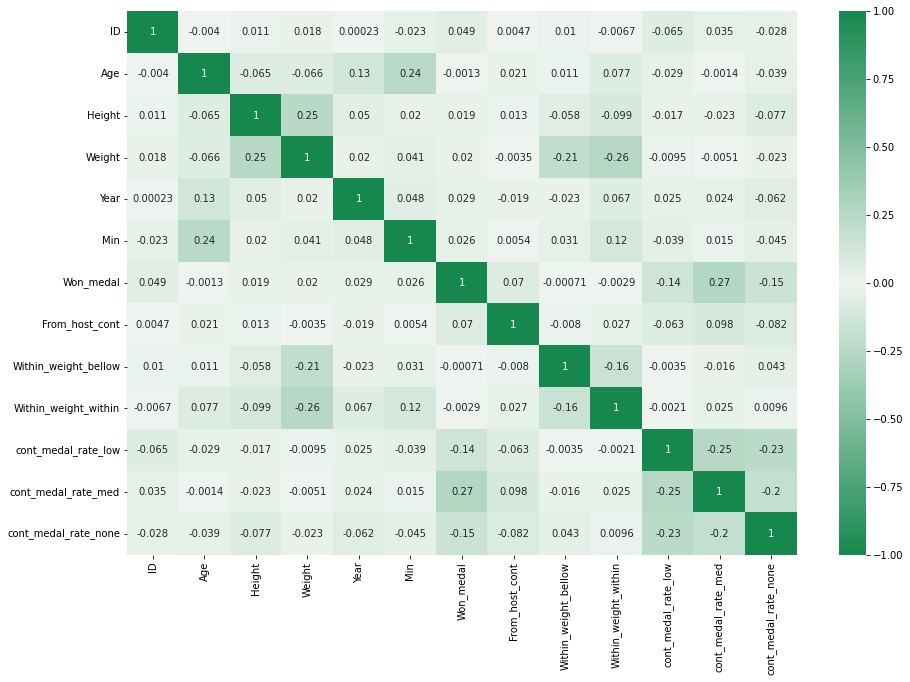

In [ ]:
plt.figure(figsize=(15,10))
sym_col = sns.diverging_palette(500, 500, s=95, as_cmap=True)

sns.heatmap(cor_fe.corr(), annot=True, vmin=-1,vmax=1, center = 0, cmap=sym_col)
plt.show()

## Random Selection as basepoint

In [ ]:
ran_train = train.copy()
ran_test = test.copy()

In [ ]:
ran_train['Won_medal']= ran_train['Medal'].notnull()
ran_test['Won_medal']= ran_test['Medal'].notnull()

In [ ]:
random.seed(1)
ran_train['random'] = np.nan
for i in range(len(ran_train)):
  ran_train.iloc[i,17] = random.randint(1,7)
ran_train['ypred'] = False
ran_train.loc[ran_train.random == 1, 'ypred'] =True

In [ ]:
apr(ran_train['ypred'], ran_train['Won_medal'])

Accuracy:0.7486877480476252
Precision:0.16188714153561518
Recall:0.14204545454545456
F1:0.1513186338089062


(0.7486877480476252,
 0.16188714153561518,
 0.14204545454545456,
 0.1513186338089062)

Test accuracy =  0.7486877480476252


0.7486877480476252

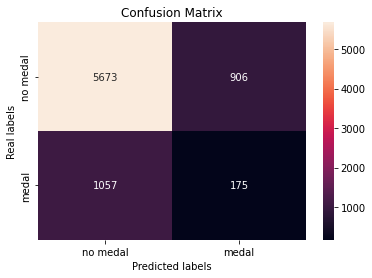

In [ ]:
produce_confusion('medal', 'no medal', 0.2, ran_train, 'ypred', 'Won_medal')

In [ ]:
random.seed(11)
ran_test['random'] = np.nan
for i in range(len(ran_test)):
  ran_test.iloc[i,17] = random.randint(1,7)
ran_test['ypred'] = False
ran_test.loc[ran_test.random == 1, 'ypred'] =True

In [ ]:
apr(ran_test['ypred'], ran_test['Won_medal'])

Accuracy:0.7437980241492865
Precision:0.18072289156626506
Recall:0.16150740242261102
F1:0.17057569296375266


(0.7437980241492865,
 0.18072289156626506,
 0.16150740242261102,
 0.17057569296375266)

Test accuracy =  0.7486877480476252


0.7486877480476252

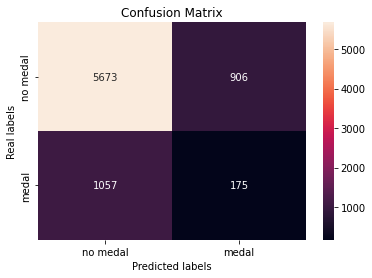

In [ ]:
produce_confusion('medal', 'no medal', 0.2, ran_train, 'ypred', 'Won_medal')

## Random Forest

### One hot encode all countries

In [ ]:
dt_col_rem = ['Sex', 'Sport', 'weight_class','NOC', 'City', 'Event', 'Medal', 'Min', 'Max', 'ID','Name','Host_Country','cont_medal_rate']
dt_ohe = [ 'Within_weight', 'Team']

In [ ]:
dt_fe_train = feature_eng(train, dt_col_rem, dt_ohe)

In [ ]:
dt_fe_test = feature_eng(test, dt_col_rem, dt_ohe)

In [ ]:
dt_fe_train.columns

Index(['Age', 'Height', 'Weight', 'Year', 'Won_medal', 'From_host_cont',
       'Within_weight_bellow', 'Within_weight_within', 'Team_Albania',
       'Team_Algeria',
       ...
       'Team_Uruguay', 'Team_Uzbekistan', 'Team_Vanuatu', 'Team_Venezuela',
       'Team_Vietnam', 'Team_West Germany', 'Team_Yemen', 'Team_Yugoslavia',
       'Team_Zambia', 'Team_Zimbabwe'],
      dtype='object', length=202)

In [ ]:
# remove columns that are different between train and test

for i in dt_fe_test.columns:
  if i not in dt_fe_train.columns:
    del dt_fe_test[i]

for i in dt_fe_train.columns:
  if i not in dt_fe_test.columns:
    del dt_fe_train[i]

In [ ]:
X_train = dt_fe_train.copy()
X_train.drop(columns = 'Won_medal', inplace=True)
y_train = dt_fe_train['Won_medal']

X_test = dt_fe_test.copy()
X_test.drop(columns = 'Won_medal', inplace=True)
y_test = dt_fe_test['Won_medal']

In [ ]:
X_train

,Age,Height,Weight,Year,From_host_cont,Within_weight_bellow,Within_weight_within,Team_Albania,Team_Algeria,Team_American Samoa,Team_Andorra,Team_Angola,Team_Argentina,Team_Armenia,Team_Aruba,Team_Australia,Team_Austria,Team_Azerbaijan,Team_Bahamas,Team_Barbados,Team_Belarus,Team_Belgium,Team_Belize,Team_Benin,Team_Bolivia,Team_Bosnia and Herzegovina,Team_Botswana,Team_Brazil,Team_Bulgaria,Team_Burkina Faso,Team_Burundi,Team_Cambodia,Team_Cameroon,Team_Canada,Team_Cape Verde,Team_Central African Republic,Team_Chad,Team_Chile,Team_China,Team_Chinese Taipei,...,Team_Senegal,Team_Serbia,Team_Serbia and Montenegro,Team_Seychelles,Team_Sierra Leone,Team_Singapore,Team_Slovakia,Team_Slovenia,Team_Solomon Islands,Team_South Africa,Team_South Korea,Team_Spain,Team_Sri Lanka,Team_Sudan,Team_Swaziland,Team_Sweden,Team_Switzerland,Team_Syria,Team_Tajikistan,Team_Tanzania,Team_Thailand,Team_Togo,Team_Tonga,Team_Trinidad and Tobago,Team_Tunisia,Team_Turkey,Team_Turkmenistan,Team_Uganda,Team_Ukraine,Team_United Arab Emirates,Team_United States,Team_United States Virgin Islands,Team_Uruguay,Team_Uzbekistan,Team_Vanuatu,Team_Venezuela,Team_Vietnam,Team_Yemen,Team_Zambia,Team_Zimbabwe
146,24.0,-1.955556,-0.533333,2000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,21.0,0.139535,-0.604651,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,20.0,6.093023,-1.186047,2004,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1080,20.0,-1.400000,-0.266667,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1178,23.0,-4.400000,-4.266667,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270839,26.0,-2.142857,-0.264286,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
270853,19.0,-0.061224,-6.477912,1976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
270918,27.0,-0.550926,-3.237443,1976,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
270981,23.0,1.597510,3.759184,2004,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rf_fe_test = dt_fe_test.copy()
rf_fe_train = dt_fe_train.copy()

#### Decision Tree

In [ ]:
treeclf = DecisionTreeClassifier(max_depth=80, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=80, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
treeclf.classes_

array([False,  True])

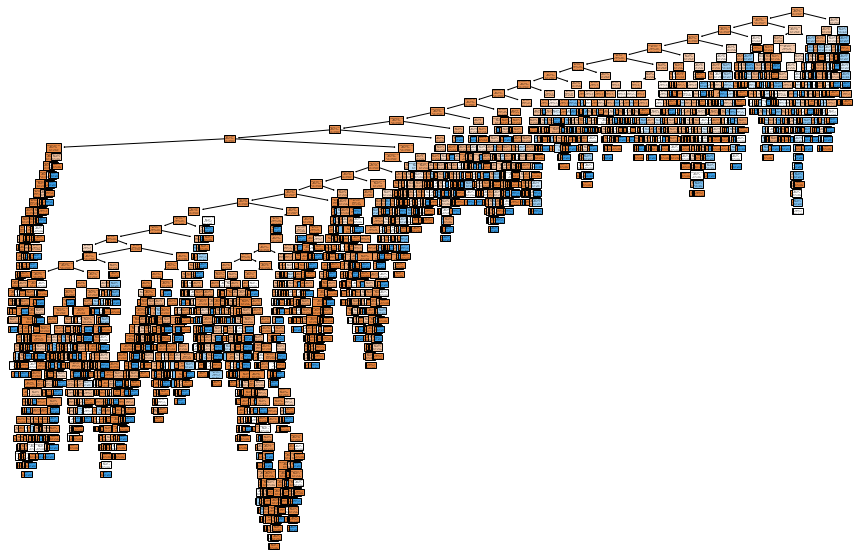

In [ ]:
fig = plt.figure(figsize=(15,10))
thing = tree.plot_tree(treeclf, 
                   feature_names= X_train.columns,  
                   class_names=['no medal', 'Medal'],
                   filled=True)

In [ ]:
print(f'Score on training set: {treeclf.score(X_train, y_train)}')
print(f'Score on testing set: {treeclf.score(X_test, y_test)}')
    

Score on training set: 0.9996159262578415
Score on testing set: 0.7585071350164654


Test accuracy =  0.9996159262578415


0.9996159262578415

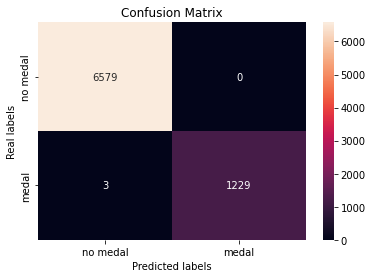

In [ ]:
dt_fe_train['ypred'] = treeclf.predict(X_train)
produce_confusion('medal', 'no medal', 0.2, dt_fe_train, 'ypred', 'Won_medal')

In [ ]:
apr(dt_fe_train['ypred'], y_train)

Accuracy:0.9996159262578415
Precision:1.0
Recall:0.997564935064935
F1:0.9987809833401057


(0.9996159262578415, 1.0, 0.997564935064935, 0.9987809833401057)

In [ ]:
y_test_pred = treeclf.predict(X_test)
apr(y_test_pred, y_test)

Accuracy:0.7585071350164654
Precision:0.26544021024967146
Recall:0.2718707940780619
F1:0.2686170212765957


(0.7585071350164654,
 0.26544021024967146,
 0.2718707940780619,
 0.2686170212765957)

Test accuracy =  0.7585071350164654


0.7585071350164654

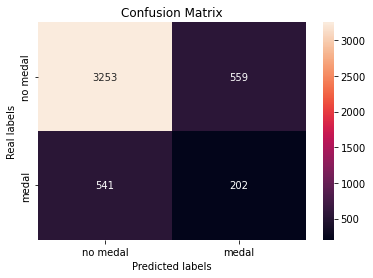

In [ ]:
dt_fe_test['ypred'] = treeclf.predict(X_test)
produce_confusion('medal', 'no medal', 'binary', dt_fe_test, 'ypred', 'Won_medal')

##### Grid Search

In [ ]:

grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [30,40,60,80,100],
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
                    cv = 5,
                    refit = True,
                    verbose = 1,
                    scoring = 'f1')

In [ ]:

now = time()

grid.fit(X_train, y_train)

print(f' Time in seconds: {time() - now}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Time in seconds: 88.74657011032104


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.5min finished


In [ ]:
grid.best_params_

{'max_depth': 80, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [ ]:
#
grid.best_score_

0.2576871604418988

##### Feature Importance

In [ ]:
importance = list(zip(X_train.columns, list(treeclf.feature_importances_)))

In [ ]:
importance

[('Age', 0.155546315348497),
 ('Height', 0.25581730739358155),
 ('Weight', 0.2573037574452151),
 ('Year', 0.13227421197195366),
 ('From_host_cont', 0.00678561778958846),
 ('Within_weight_bellow', 0.0027613829825614104),
 ('Within_weight_within', 0.013105426599032523),
 ('Team_Albania', 0.0),
 ('Team_Algeria', 0.000822756573809102),
 ('Team_American Samoa', 0.0),
 ('Team_Andorra', 0.0),
 ('Team_Angola', 0.0),
 ('Team_Argentina', 0.0004825410757608025),
 ('Team_Armenia', 0.0011902679868766464),
 ('Team_Aruba', 0.0),
 ('Team_Australia', 0.0),
 ('Team_Austria', 0.0028127858360607965),
 ('Team_Azerbaijan', 0.0020948948918962373),
 ('Team_Bahamas', 0.0),
 ('Team_Barbados', 0.0),
 ('Team_Belarus', 0.0016121852878967125),
 ('Team_Belgium', 0.002795352882521247),
 ('Team_Belize', 0.0),
 ('Team_Benin', 0.0),
 ('Team_Bolivia', 0.0),
 ('Team_Bosnia and Herzegovina', 0.0),
 ('Team_Botswana', 0.0),
 ('Team_Brazil', 0.0024986614102496486),
 ('Team_Bulgaria', 0.003363150049675653),
 ('Team_Burkina Fas

#### Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50)

In [ ]:
rf_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
print(f'Random scored {rf_score}')

Random scored 0.8371521164443768


In [ ]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5,10,20,40,60,80],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='f1')

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

0.18617309516909555


{'max_depth': None, 'n_estimators': 100}

In [ ]:
gs.score(X_train, y_train)

0.9987829614604463

In [ ]:
rf_fe_train['ypreds'] = gs.predict(X_train)

In [ ]:
rf_fe_train['ypreds'].value_counts()

False    6578
True     1233
Name: ypreds, dtype: int64

In [ ]:
rf_fe_train

,Age,Height,Weight,Year,Won_medal,From_host_cont,Within_weight_bellow,Within_weight_within,Team_Albania,Team_Algeria,Team_American Samoa,Team_Andorra,Team_Angola,Team_Argentina,Team_Armenia,Team_Aruba,Team_Australia,Team_Austria,Team_Azerbaijan,Team_Bahamas,Team_Barbados,Team_Belarus,Team_Belgium,Team_Belize,Team_Benin,Team_Bolivia,Team_Bosnia and Herzegovina,Team_Botswana,Team_Brazil,Team_Bulgaria,Team_Burkina Faso,Team_Burundi,Team_Cambodia,Team_Cameroon,Team_Canada,Team_Cape Verde,Team_Central African Republic,Team_Chad,Team_Chile,Team_China,...,Team_Serbia,Team_Serbia and Montenegro,Team_Seychelles,Team_Sierra Leone,Team_Singapore,Team_Slovakia,Team_Slovenia,Team_Solomon Islands,Team_South Africa,Team_South Korea,Team_Spain,Team_Sri Lanka,Team_Sudan,Team_Swaziland,Team_Sweden,Team_Switzerland,Team_Syria,Team_Tajikistan,Team_Tanzania,Team_Thailand,Team_Togo,Team_Tonga,Team_Trinidad and Tobago,Team_Tunisia,Team_Turkey,Team_Turkmenistan,Team_Uganda,Team_Ukraine,Team_United Arab Emirates,Team_United States,Team_United States Virgin Islands,Team_Uruguay,Team_Uzbekistan,Team_Vanuatu,Team_Venezuela,Team_Vietnam,Team_Yemen,Team_Zambia,Team_Zimbabwe,ypreds
146,24.0,-1.955556,-0.533333,2000,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
161,21.0,0.139535,-0.604651,2016,True,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
311,20.0,6.093023,-1.186047,2004,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,True
1080,20.0,-1.400000,-0.266667,2016,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
1178,23.0,-4.400000,-4.266667,2016,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270839,26.0,-2.142857,-0.264286,2016,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
270853,19.0,-0.061224,-6.477912,1976,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
270918,27.0,-0.550926,-3.237443,1976,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
270981,23.0,1.597510,3.759184,2004,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


In [ ]:
apr(rf_fe_train['Won_medal'], rf_fe_train['ypreds'])

Accuracy:0.9996159262578415
Precision:0.9991883116883117
Recall:0.9983779399837794
F1:0.9987829614604463


(0.9996159262578415,
 0.9991883116883117,
 0.9983779399837794,
 0.9987829614604463)

##### test

In [ ]:
rf_fe_test['ypreds'] = gs.predict(X_test)

In [ ]:
apr(rf_fe_test['Won_medal'], rf_fe_test['ypreds'])

Accuracy:0.8259055982436883
Precision:0.1386271870794078
Recall:0.40234375
F1:0.2062062062062062


(0.8259055982436883, 0.1386271870794078, 0.40234375, 0.2062062062062062)

In [ ]:
rf_fe_test['ypreds'].value_counts()

False    4299
True      256
Name: ypreds, dtype: int64

#### extra random


In [ ]:
et = ExtraTreesClassifier(n_estimators=50)

In [ ]:
et_score = cross_val_score(et, X_train, y_train, cv=5).mean()
print(f'Extra Random scored {et_score}')

Extra Random scored 0.8201246331007622


In [ ]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}


gset = GridSearchCV(et, param_grid=rf_params, cv=5, scoring='f1')

gset.fit(X_train, y_train)

print(gset.best_score_)

gset.best_params_

0.23765614577215555


{'max_depth': None, 'n_estimators': 150}

In [ ]:
rf_fe_train['ypred'] = gset.predict(X_train)

In [ ]:
rf_fe_train['ypred'].value_counts()

False    6582
True     1229
Name: ypred, dtype: int64

In [ ]:
apr(rf_fe_train['Won_medal'], rf_fe_train['ypred'])

Accuracy:0.9996159262578415
Precision:0.997564935064935
Recall:1.0
F1:0.9987809833401057


(0.9996159262578415, 0.997564935064935, 1.0, 0.9987809833401057)

##### test

In [ ]:
rf_fe_test['ypred'] = gs.predict(X_test)

In [ ]:
apr(rf_fe_test['Won_medal'], rf_fe_test['ypred'])

Accuracy:0.8259055982436883
Precision:0.1386271870794078
Recall:0.40234375
F1:0.2062062062062062


(0.8259055982436883, 0.1386271870794078, 0.40234375, 0.2062062062062062)

In [ ]:
rf_fe_test['ypred'].value_counts()

False    4299
True      256
Name: ypred, dtype: int64

### Categorise countries

In [ ]:
dt_fe_train = feature_eng(train, ['Sex', 'Sport', 'weight_class','NOC', 'City', 'Event', 'Medal', 'Min', 'Max', 'ID','Name','Host_Country','Team'], [ 'Within_weight', 'cont_medal_rate'])

In [ ]:
dt_fe_test = feature_eng(test, ['Sex', 'Sport', 'weight_class','NOC', 'City', 'Event', 'Medal', 'Min', 'Max', 'ID','Name','Host_Country', 'Team'], [ 'Within_weight', 'cont_medal_rate'])

In [ ]:
for i in dt_fe_test.columns:
  if i not in dt_fe_train.columns:
    del dt_fe_test[i]

In [ ]:
for i in dt_fe_train.columns:
  if i not in dt_fe_test.columns:
    del dt_fe_train[i]

In [ ]:
X_train = dt_fe_train.copy()
X_train.drop(columns = 'Won_medal', inplace=True)
y_train = dt_fe_train['Won_medal']

X_test = dt_fe_test.copy()
X_test.drop(columns = 'Won_medal', inplace=True)
y_test = dt_fe_test['Won_medal']

In [ ]:
X_train

,Age,Height,Weight,Year,From_host_cont,Within_weight_bellow,Within_weight_within,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none
146,24.0,-1.955556,-0.533333,2000,0,0,1,1,0,0
161,21.0,0.139535,-0.604651,2016,0,0,1,0,1,0
311,20.0,6.093023,-1.186047,2004,0,0,1,0,1,0
1080,20.0,-1.400000,-0.266667,2016,0,0,1,0,0,0
1178,23.0,-4.400000,-4.266667,2016,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
270839,26.0,-2.142857,-0.264286,2016,0,0,1,0,0,0
270853,19.0,-0.061224,-6.477912,1976,0,0,0,0,1,0
270918,27.0,-0.550926,-3.237443,1976,0,0,1,0,1,0
270981,23.0,1.597510,3.759184,2004,0,0,1,0,0,0


In [ ]:
rf_fe_test = dt_fe_test.copy()
rf_fe_train = dt_fe_train.copy()

#### Decision Tree

In [ ]:
treeclf = DecisionTreeClassifier(max_depth=60, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=60, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
treeclf.classes_

array([False,  True])

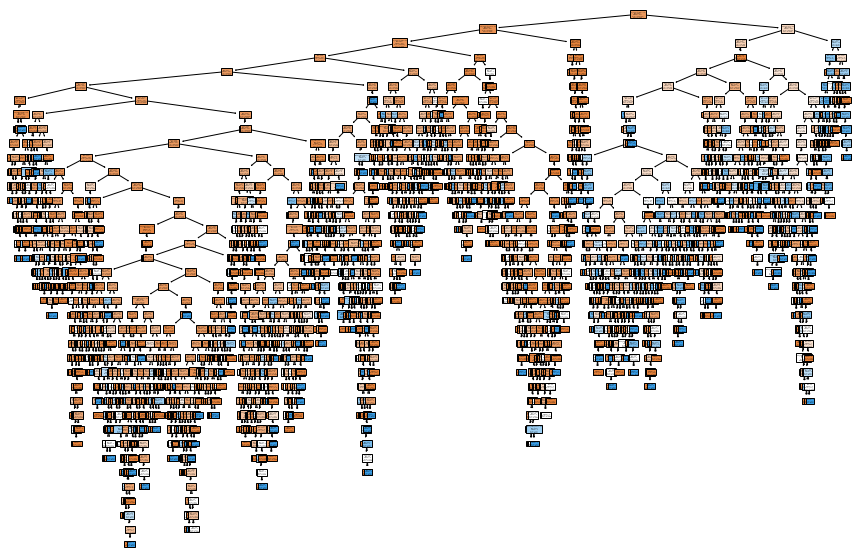

In [ ]:
fig = plt.figure(figsize=(15,10))
thing = tree.plot_tree(treeclf, 
                   feature_names= X_train.columns,  
                   class_names=['no medal', 'Medal'],
                   filled=True)

In [ ]:
print(f'Score on training set: {treeclf.score(X_train, y_train)}')
print(f'Score on testing set: {treeclf.score(X_test, y_test)}')
    

Score on training set: 0.9965433363205736
Score on testing set: 0.7411635565312843


Test accuracy =  0.9965433363205736


0.9965433363205736

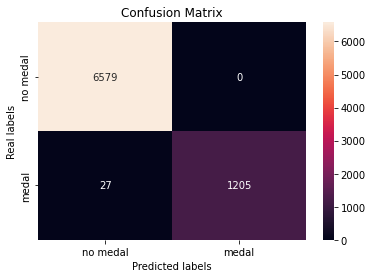

In [ ]:
dt_fe_train['ypred'] = treeclf.predict(X_train)
produce_confusion('medal', 'no medal', 0.2, dt_fe_train, 'ypred', 'Won_medal')

In [ ]:
apr(dt_fe_train['ypred'], y_train)

Accuracy:0.9965433363205736
Precision:1.0
Recall:0.9780844155844156
F1:0.988920804267542


(0.9965433363205736, 1.0, 0.9780844155844156, 0.988920804267542)

In [ ]:
y_test_pred = treeclf.predict(X_test)
apr(y_test_pred, y_test)

Accuracy:0.7411635565312843
Precision:0.20540540540540542
Recall:0.20457604306864063
F1:0.20498988536749832


(0.7411635565312843,
 0.20540540540540542,
 0.20457604306864063,
 0.20498988536749832)

Test accuracy =  0.7411635565312843


0.7411635565312843

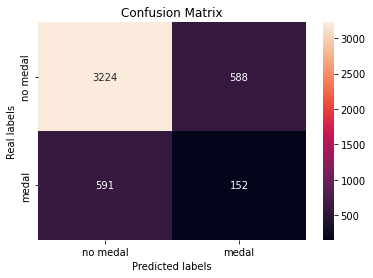

In [ ]:
dt_fe_test['ypred'] = treeclf.predict(X_test)
produce_confusion('medal', 'no medal', 'binary', dt_fe_test, 'ypred', 'Won_medal')

##### Grid Search

In [ ]:

grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [30,40,60,80,100],
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
                    cv = 5,
                    refit = True,
                    verbose = 1,
                    scoring = 'f1')

In [ ]:

now = time()

grid.fit(X_train, y_train)

print(f' Time in seconds: {time() - now}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


 Time in seconds: 15.846860408782959


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   15.8s finished


In [ ]:
grid.best_params_

{'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 5}

In [ ]:
#
grid.best_score_

0.2790948650564129

##### Feature Importance

In [ ]:
importance = list(zip(X_train.columns, list(treeclf.feature_importances_)))

In [ ]:
importance

[('Age', 0.14967762930753026),
 ('Height', 0.3221484596553562),
 ('Weight', 0.26494720735225),
 ('Year', 0.10888782432125821),
 ('From_host_cont', 0.01104989701318086),
 ('Within_weight_bellow', 0.0020626883266715054),
 ('Within_weight_within', 0.018371409672294923),
 ('cont_medal_rate_low', 0.014002909481208395),
 ('cont_medal_rate_med', 0.0944252417663596),
 ('cont_medal_rate_none', 0.014426733103890137)]

##### cross_val_score

In [ ]:
tree = DecisionTreeClassifier(random_state=124)

scores = cross_val_score(treeclf, X_train, y_train, cv = 5)

In [ ]:
scores

array([0.76775432, 0.79065301, 0.74711908, 0.76056338, 0.75608195])

#### Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50)

In [ ]:
rf_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
print(f'Random scored {rf_score}')

Random scored 0.8284476240330367


In [ ]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5,10,20,40,60,80],
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='f1')

gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_

0.19432415762575309


{'max_depth': 40, 'n_estimators': 100}

In [ ]:
gs.score(X_train, y_train)

0.9889660809154066

In [ ]:
rf_fe_train['ypreds'] = gs.predict(X_train)

In [ ]:
rf_fe_train['ypreds'].value_counts()

False    6596
True     1215
Name: ypreds, dtype: int64

In [ ]:
rf_fe_train

,Age,Height,Weight,Year,Won_medal,From_host_cont,Within_weight_bellow,Within_weight_within,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none,ypreds
146,24.0,-1.955556,-0.533333,2000,False,0,0,1,1,0,0,False
161,21.0,0.139535,-0.604651,2016,True,0,0,1,0,1,0,True
311,20.0,6.093023,-1.186047,2004,True,0,0,1,0,1,0,True
1080,20.0,-1.400000,-0.266667,2016,True,0,0,1,0,0,0,True
1178,23.0,-4.400000,-4.266667,2016,False,0,0,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
270839,26.0,-2.142857,-0.264286,2016,False,0,0,1,0,0,0,False
270853,19.0,-0.061224,-6.477912,1976,False,0,0,0,0,1,0,False
270918,27.0,-0.550926,-3.237443,1976,False,0,0,1,0,1,0,False
270981,23.0,1.597510,3.759184,2004,True,0,0,1,0,0,0,True


In [ ]:
apr(rf_fe_train['Won_medal'], rf_fe_train['ypreds'])

Accuracy:0.9965433363205736
Precision:0.9821428571428571
Recall:0.9958847736625515
F1:0.9889660809154066


(0.9965433363205736,
 0.9821428571428571,
 0.9958847736625515,
 0.9889660809154066)

##### test

In [ ]:
rf_fe_test['ypreds'] = gs.predict(X_test)

In [ ]:
apr(rf_fe_test['Won_medal'], rf_fe_test['ypreds'])

Accuracy:0.8208562019758507
Precision:0.0847913862718708
Recall:0.3165829145728643
F1:0.1337579617834395


(0.8208562019758507,
 0.0847913862718708,
 0.3165829145728643,
 0.1337579617834395)

In [ ]:
rf_fe_test['ypreds'].value_counts()

False    4356
True      199
Name: ypreds, dtype: int64

#### extra random


In [ ]:
et = ExtraTreesClassifier(n_estimators=50)

In [ ]:
et_score = cross_val_score(et, X_train, y_train, cv=5).mean()
print(f'Extra Random scored {et_score}')

Extra Random scored 0.8169250014131201


In [ ]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}


gset = GridSearchCV(et, param_grid=rf_params, cv=5, scoring='f1')

gset.fit(X_train, y_train)

print(gset.best_score_)

gset.best_params_

0.2148361552737113


{'max_depth': None, 'n_estimators': 100}

In [ ]:
rf_fe_train['ypred'] = gset.predict(X_train)

In [ ]:
rf_fe_train['ypred'].value_counts()

False    6606
True     1205
Name: ypred, dtype: int64

In [ ]:
apr(rf_fe_train['Won_medal'], rf_fe_train['ypred'])

Accuracy:0.9965433363205736
Precision:0.9780844155844156
Recall:1.0
F1:0.988920804267542


(0.9965433363205736, 0.9780844155844156, 1.0, 0.988920804267542)

##### test

In [ ]:
rf_fe_test['ypred'] = gs.predict(X_test)

In [ ]:
apr(rf_fe_test['Won_medal'], rf_fe_test['ypred'])

Accuracy:0.8208562019758507
Precision:0.0847913862718708
Recall:0.3165829145728643
F1:0.1337579617834395


(0.8208562019758507,
 0.0847913862718708,
 0.3165829145728643,
 0.1337579617834395)

In [ ]:
rf_fe_test['ypred'].value_counts()

False    4356
True      199
Name: ypred, dtype: int64

## Logistic Regression

In [ ]:
lr_col_rem = ['Within_weight','Height','Age', 'Year','Sex', 'Sport', 'weight_class','NOC', 'City', 'Event', 'Medal', 'Min', 'Max', 'Team','ID','Name','Host_Country']
lr_ohe = [ 'cont_medal_rate']
lr_fe_train = feature_eng(train, lr_col_rem , lr_ohe)

In [ ]:
lr_fe_train

,Weight,Won_medal,From_host_cont,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none
146,-0.533333,False,0,1,0,0
161,-0.604651,True,0,0,1,0
311,-1.186047,True,0,0,1,0
1080,-0.266667,True,0,0,0,0
1178,-4.266667,False,0,0,0,0
...,...,...,...,...,...,...
270839,-0.264286,False,0,0,0,0
270853,-6.477912,False,0,0,1,0
270918,-3.237443,False,0,0,1,0
270981,3.759184,True,0,0,0,0


In [ ]:
X_train = lr_fe_train.copy()
X_train.drop(columns = 'Won_medal', inplace = True)
y_train = lr_fe_train['Won_medal'].copy()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7811 entries, 146 to 271033
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weight                7811 non-null   float64
 1   From_host_cont        7811 non-null   int64  
 2   cont_medal_rate_low   7811 non-null   uint8  
 3   cont_medal_rate_med   7811 non-null   uint8  
 4   cont_medal_rate_none  7811 non-null   uint8  
dtypes: float64(1), int64(1), uint8(3)
memory usage: 526.0 KB


In [ ]:
X_train = sm.add_constant(X_train)

my_model = sm.Logit(y_train, X_train).fit()

my_model.summary()

Optimization terminated successfully.
         Current function value: 0.372884
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Won_medal   No. Observations:                 7811
Model:                          Logit   Df Residuals:                     7805
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.1445
Time:                        14:07:27   Log-Likelihood:                -2912.6
converged:                       True   LL-Null:                       -3404.7
Covariance Type:            nonrobust   LLR p-value:                1.640e-210
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6202      0.046    -35.023      0.000      -1.711      -1.530
Weight                   0.0105      0.005      1.925      0.054      -0.000       0.021
From_host_cont           0.3668      0.139      2.641      0.008       0.095       0.639
cont_medal_rate_low     -1.1744      0.110    -10.669      0.000      -1.390      -0.959
cont_medal_rate_med      1.1895      0.072     16.447      0.000       1.048       1.331
cont_medal_rate_none    -3.2691      0.338     -9.678      0.000      -3.931      -2.607
========================================================================================
"""

In [ ]:
lr_fe_train['ypred'] = my_model.predict(X_train)

In [ ]:
lr_fe_train[lr_fe_train['Won_medal']==False]

,Weight,Won_medal,From_host_cont,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none,ypred
146,-0.533333,False,0,1,0,0,0.057315
1178,-4.266667,False,0,0,0,0,0.159109
1188,-0.266667,False,0,0,0,0,0.164791
1961,-3.186047,False,0,1,0,0,0.055833
1965,-3.304348,False,0,0,0,0,0.160461
...,...,...,...,...,...,...,...
270476,-0.192893,False,0,1,0,0,0.057508
270839,-0.264286,False,0,0,0,0,0.164794
270853,-6.477912,False,0,0,1,0,0.377885
270918,-3.237443,False,0,0,1,0,0.385892


In [ ]:
lr_fe_train[lr_fe_train['Won_medal']==True]

,Weight,Won_medal,From_host_cont,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none,ypred
161,-0.604651,True,0,0,1,0,0.392444
311,-1.186047,True,0,0,1,0,0.390993
1080,-0.266667,True,0,0,0,0,0.164791
4589,-1.930233,True,0,0,0,0,0.162408
4847,-0.186047,True,0,0,0,0,0.164907
...,...,...,...,...,...,...,...
267830,15.989189,True,0,0,0,0,0.189565
268223,3.762557,True,0,1,0,0,0.059794
268448,5.522088,True,0,0,0,0,0.173301
270304,0.600000,True,0,0,1,0,0.395454


Test accuracy =  0.8086032518243502


0.8086032518243502

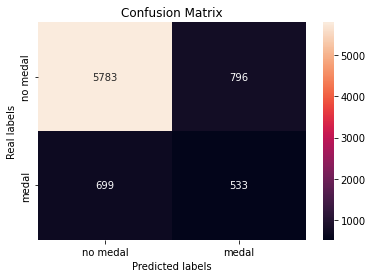

In [ ]:
produce_confusion('medal', 'no medal', 0.35, lr_fe_train, 'ypred', 'Won_medal')

In [ ]:
apr(lr_fe_train['pred_binary'], lr_fe_train['Won_medal'])

Accuracy:0.8086032518243502
Precision:0.40105342362678703
Recall:0.43262987012987014
F1:0.416243654822335


(0.8086032518243502,
 0.40105342362678703,
 0.43262987012987014,
 0.416243654822335)

### Test

In [ ]:
lr_fe_test = feature_eng(test,  lr_col_rem, lr_ohe)

In [ ]:
X_test = lr_fe_test.copy()
X_test.drop(columns = 'Won_medal', inplace = True)
y_test = lr_fe_test['Won_medal'].copy()

In [ ]:
X_test = sm.add_constant(X_test)
lr_fe_test['ypred']=my_model.predict(X_test)

In [ ]:
lr_fe_test[lr_fe_test['Won_medal']==False]

,Weight,Won_medal,From_host_cont,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none,ypred
294,0.000000,False,0,1,0,0,0.057618
611,6.129032,False,0,1,0,0,0.061202
612,-4.906250,False,0,1,0,0,0.054892
1095,0.129032,False,0,0,0,0,0.165362
3031,-0.437500,False,0,1,0,0,0.057370
...,...,...,...,...,...,...,...
270305,1.211765,False,0,0,1,0,0.396986
270446,0.211765,False,0,1,0,0,0.057738
270554,-3.054054,False,0,1,0,0,0.055906
270802,-1.112613,False,0,0,0,1,0.007384


In [ ]:
lr_fe_test[lr_fe_test['Won_medal']==True]

,Weight,Won_medal,From_host_cont,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none,ypred
12477,0.129032,True,0,0,0,0,0.165362
15574,-4.725806,True,0,0,1,0,0.382207
40344,-8.656250,True,0,0,0,0,0.153057
41414,-1.281250,True,0,1,0,0,0.056894
41508,13.343750,True,0,1,0,0,0.065688
...,...,...,...,...,...,...,...
268735,-1.788235,True,0,0,0,0,0.162611
269325,1.028846,True,0,0,0,0,0.166666
269541,-7.833333,True,0,0,0,0,0.154177
270306,1.211765,True,0,0,1,0,0.396986


Test accuracy =  0.7760702524698134


0.7760702524698134

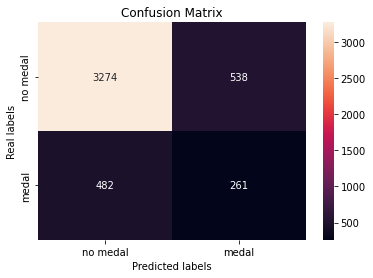

In [ ]:
produce_confusion('medal', 'no medal', 0.35, lr_fe_test, 'ypred', 'Won_medal')

In [ ]:
lr_fe_test

,Weight,Won_medal,From_host_cont,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none,ypred,pred_binary
294,0.000000,False,0,1,0,0,0.057618,0
611,6.129032,False,0,1,0,0,0.061202,0
612,-4.906250,False,0,1,0,0,0.054892,0
1095,0.129032,False,0,0,0,0,0.165362,0
3031,-0.437500,False,0,1,0,0,0.057370,0
...,...,...,...,...,...,...,...,...
270446,0.211765,False,0,1,0,0,0.057738,0
270554,-3.054054,False,0,1,0,0,0.055906,0
270802,-1.112613,False,0,0,0,1,0.007384,0
270838,0.168831,False,0,0,0,0,0.165419,0


In [ ]:
apr(lr_fe_test['pred_binary'], lr_fe_test['Won_medal'])

Accuracy:0.7760702524698134
Precision:0.32665832290362956
Recall:0.351278600269179
F1:0.33852140077821014


(0.7760702524698134,
 0.32665832290362956,
 0.351278600269179,
 0.33852140077821014)

## LR messing

In [ ]:
lr_fe_train.columns

Index(['Weight', 'Won_medal', 'From_host_cont', 'cont_medal_rate_low',
       'cont_medal_rate_med', 'cont_medal_rate_none', 'ypred', 'pred_binary'],
      dtype='object')

In [ ]:
lr_fe_train.sort_values('ypred', ascending=False, inplace=True)

In [ ]:
lr_fe_train.head(650)

,Weight,Won_medal,From_host_cont,cont_medal_rate_low,cont_medal_rate_med,cont_medal_rate_none,ypred,pred_binary
173166,96.645669,True,0,0,1,0,0.641287,1
237040,61.894068,True,0,0,1,0,0.554082,1
237039,61.894068,False,0,0,1,0,0.554082,1
173427,15.202532,False,1,0,1,0,0.523781,1
16375,9.894068,True,1,0,1,0,0.509905,1
...,...,...,...,...,...,...,...,...
75793,-0.035503,False,0,0,1,0,0.393865,1
110204,-0.035503,False,0,0,1,0,0.393865,1
225154,-0.035503,False,0,0,1,0,0.393865,1
110257,-0.035503,True,0,0,1,0,0.393865,1
